In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train.csv", index_col=False)
test = pd.read_csv("test.csv", index_col=False)

In [3]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
x = train.drop("price_range", axis=1)
y = train["price_range"]

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1600, 20), (400, 20), (1600,), (400,))

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [8]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

def fit_and_score(models, x_train, x_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [9]:
scores = fit_and_score(models, x_train, x_test, y_train, y_test)

c:\Users\ardaa\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'Scores by Model Name')

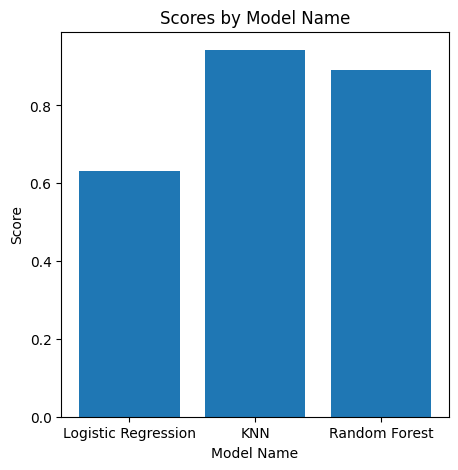

In [10]:
plt.figure(figsize=(5, 5))
plt.bar(scores.keys(), scores.values())
plt.xlabel('Model Name')
plt.ylabel('Score')
plt.title('Scores by Model Name')

In [11]:
KNeighborsClassifier().fit(x_train, y_train).score(x_test, y_test)

0.9425

In [12]:
neighbors = np.arange(1, 21, 1)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    i-=1
    knn.fit(x_train, y_train)
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)

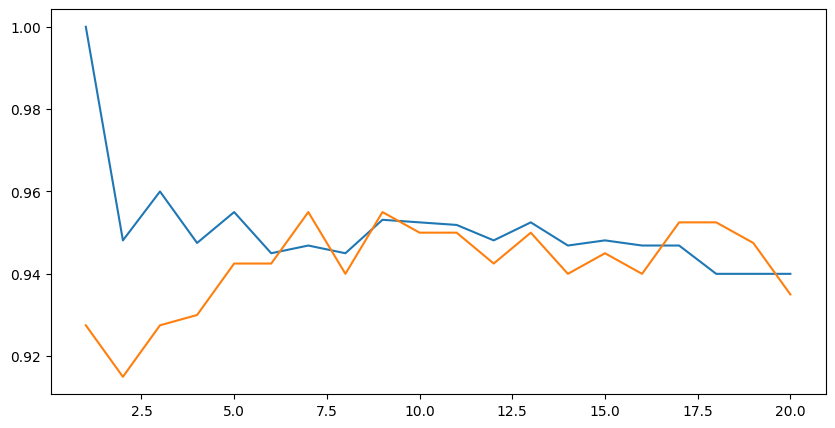

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(neighbors, train_accuracy)
plt.plot(neighbors, test_accuracy)

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [15]:
knn_grid = {
    "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
    "leaf_size": np.arange(10,60,10),
    "n_neighbors": np.arange(1, 21, 1)
}

rs = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=knn_grid,
    cv=5,
    n_iter=50,
    verbose=True
    )

In [16]:
rs.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=50,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': array([10, 20, 30, 40, 50]),
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
                   verbose=True)

In [17]:
rs.best_params_

{'n_neighbors': 11, 'leaf_size': 20, 'algorithm': 'auto'}

In [18]:
rs.score(x_test, y_test)

0.95

In [19]:
classifier = KNeighborsClassifier(n_neighbors=11, leaf_size=20, algorithm="brute", n_jobs=-1)

In [20]:
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=20, n_jobs=-1, n_neighbors=11)

In [21]:
classifier.score(x_test, y_test)

0.95

In [26]:
print(classification_report(y_test,classifier.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       105
           1       0.92      0.96      0.94        91
           2       0.91      0.93      0.92        92
           3       1.00      0.93      0.96       112

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



In [29]:
test.drop("id", axis=1, inplace=True)
test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [30]:
test_preds = classifier.predict(test)

In [33]:
test_preds = pd.DataFrame(test_preds)
test_preds

,0
0,3
1,3
2,2
3,3
4,1
...,...
995,2
996,1
997,0
998,2


In [38]:
test_preds.to_csv("test_predictions.csv", index=False)

In [39]:
pd.read_csv("test_predictions.csv", index_col=False).head()

,0
0,3
1,3
2,2
3,3
4,1
